In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams["figure.dpi"] = 80

In [3]:
from pymc_marketing.mmm import MMM, GeometricAdstock, LogisticSaturation

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
c:\Users\mji11\AppData\Local\Programs\Python\Python311\Lib\site-packages\pymc_marketing\pytensor_utils.py:34: FutureWarning: `pytensor.graph.basic.ancestors` was moved to `pytensor.graph.traversal.ancestors`. Calling it from the old location will fail in a future release.
  from pytensor.graph.basic import ancestors


In [4]:
df = pd.read_csv("../data/processed/marketing_sales_spending.csv")

In [5]:
df.head(50)

,wk_strt_dt,yr_nbr,qtr_nbr,prd,wk_nbr,wk_in_yr_nbr,mdip_dm,mdip_inst,mdip_nsp,mdip_auddig,...,seas_prd_12,seas_week_40,seas_week_41,seas_week_42,seas_week_43,seas_week_44,seas_week_45,seas_week_46,seas_week_47,seas_week_48
0,2014-08-03,2014,3,7,1,27,4863885,29087520,2421933,692315,...,0,0,0,0,0,0,0,0,0,0
1,2014-08-10,2014,3,7,2,28,20887502,8345120,3984494,475810,...,0,0,0,0,0,0,0,0,0,0
2,2014-08-17,2014,3,7,3,29,11097724,17276800,1846832,784732,...,0,0,0,0,0,0,0,0,0,0
3,2014-08-24,2014,3,7,4,30,1023446,18468480,2394834,1032301,...,0,0,0,0,0,0,0,0,0,0
4,2014-08-31,2014,3,8,1,31,21109811,26659920,3312008,400456,...,0,0,0,0,0,0,0,0,0,0
5,2014-09-07,2014,3,8,2,32,5965633,6255666,3215276,461272,...,0,0,0,0,0,0,0,0,0,0
6,2014-09-14,2014,3,8,3,33,10034343,4232000,1365872,497614,...,0,0,0,0,0,0,0,0,0,0
7,2014-09-21,2014,3,8,4,34,12764686,15474013,2024228,270547,...,0,0,0,0,0,0,0,0,0,0
8,2014-09-28,2014,3,8,5,35,11745748,7490000,1715439,294330,...,0,0,0,0,0,0,0,0,0,0
9,2014-10-05,2014,3,9,1,36,1745214,22230560,1840733,849692,...,0,0,0,0,0,0,0,0,0,0


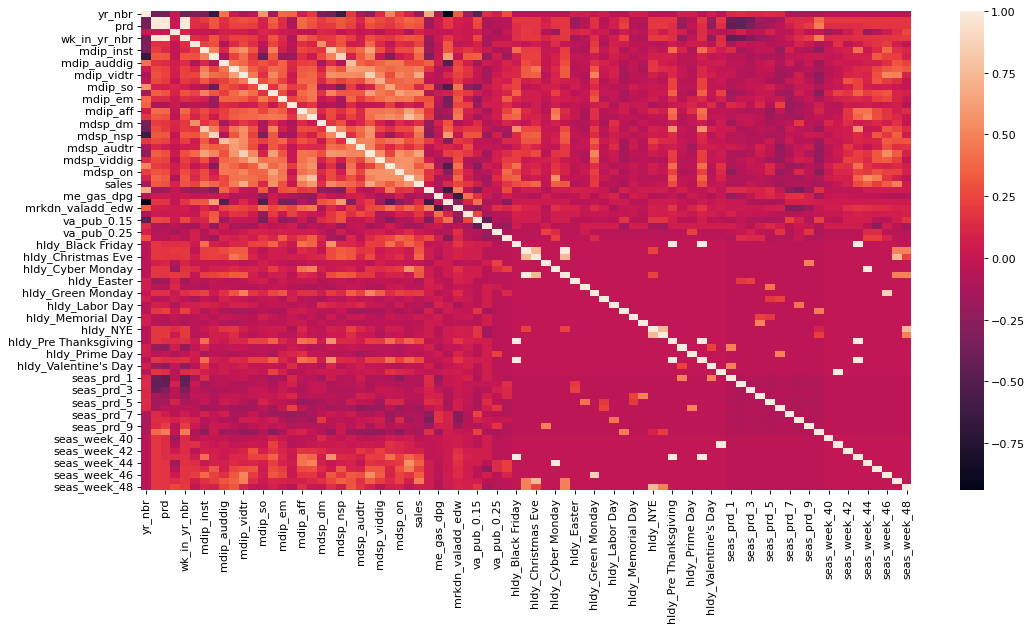

In [6]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr())
plt.tight_layout()

In [7]:
df.columns

Index(['wk_strt_dt', 'yr_nbr', 'qtr_nbr', 'prd', 'wk_nbr', 'wk_in_yr_nbr',
       'mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr',
       'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em',
       'mdip_sms', 'mdip_aff', 'mdip_sem', 'mdsp_dm', 'mdsp_inst', 'mdsp_nsp',
       'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so',
       'mdsp_on', 'mdsp_sem', 'sales', 'me_ics_all', 'me_gas_dpg', 'st_ct',
       'mrkdn_valadd_edw', 'mrkdn_pdm', 'va_pub_0.15', 'va_pub_0.2',
       'va_pub_0.25', 'va_pub_0.3', 'hldy_Black Friday', 'hldy_Christmas Day',
       'hldy_Christmas Eve', 'hldy_Columbus Day', 'hldy_Cyber Monday',
       'hldy_Day after Christmas', 'hldy_Easter', 'hldy_Father's Day',
       'hldy_Green Monday', 'hldy_July 4th', 'hldy_Labor Day', 'hldy_MLK',
       'hldy_Memorial Day', 'hldy_Mother's Day', 'hldy_NYE',
       'hldy_New Year's Day', 'hldy_Pre Thanksgiving', 'hldy_Presidents Day',
       'hldy_Prime Day', 'hldy_Thanksgiving', 'hl

<Axes: >

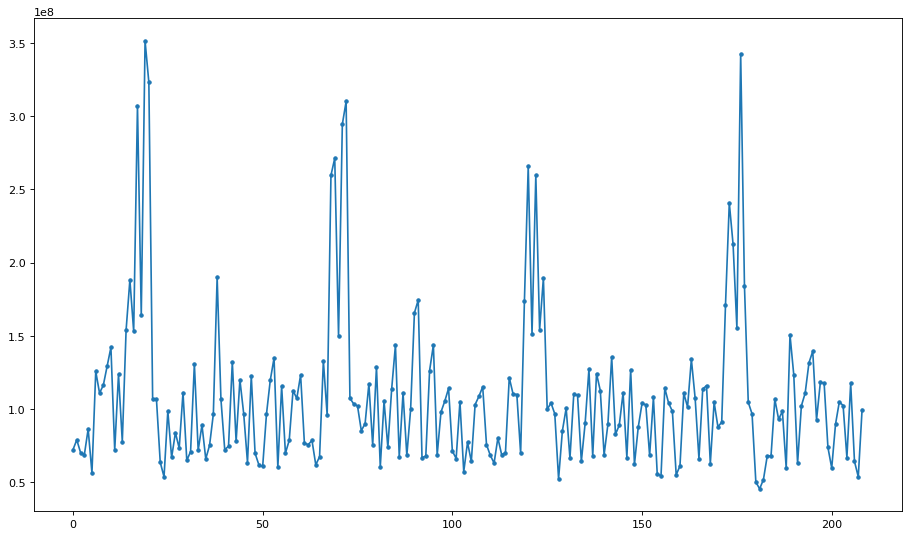

In [8]:
df.sales.plot(x="wk_in_yr_nbr", marker='.')

#### Media Spend `(prefix=’mdsp_’)`
Spend of 13 media channels: `direct mail`, `insert`, `newspaper`, `digital audio`, `radio`, `TV`, `digital video`, `social media`, `online display`, `email`, `SMS`, `affiliates`, `SEM`.

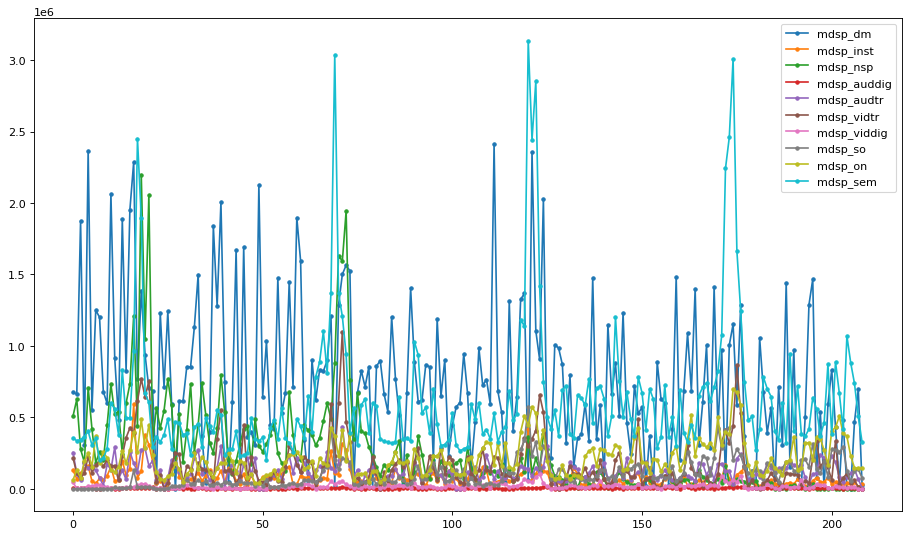

In [9]:
cols_spend = ['mdsp_dm', 'mdsp_inst', 'mdsp_nsp',
              'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so',
              'mdsp_on', 'mdsp_sem']

df[cols_spend].plot(marker='.');

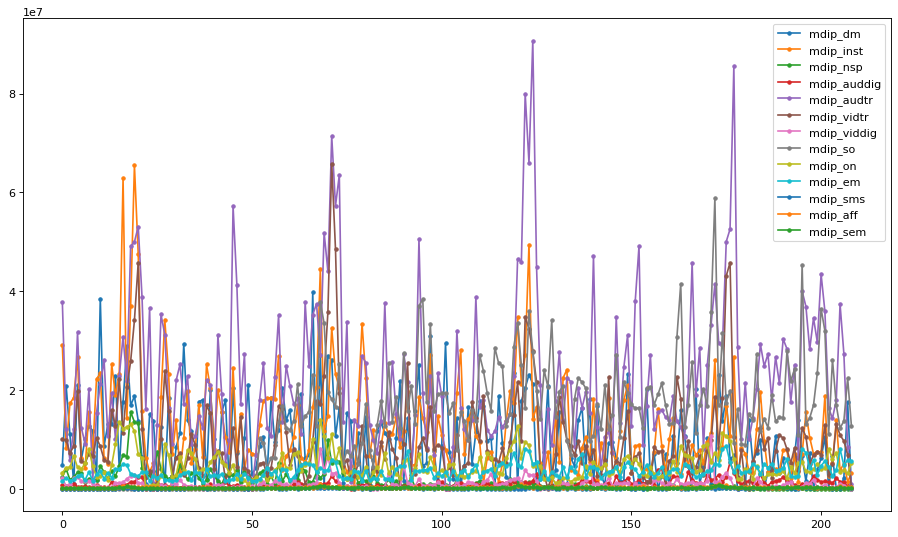

In [10]:
cols_impressions = ['mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr',
                    'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em',
                    'mdip_sms', 'mdip_aff', 'mdip_sem']

df[cols_impressions].plot(marker='.');

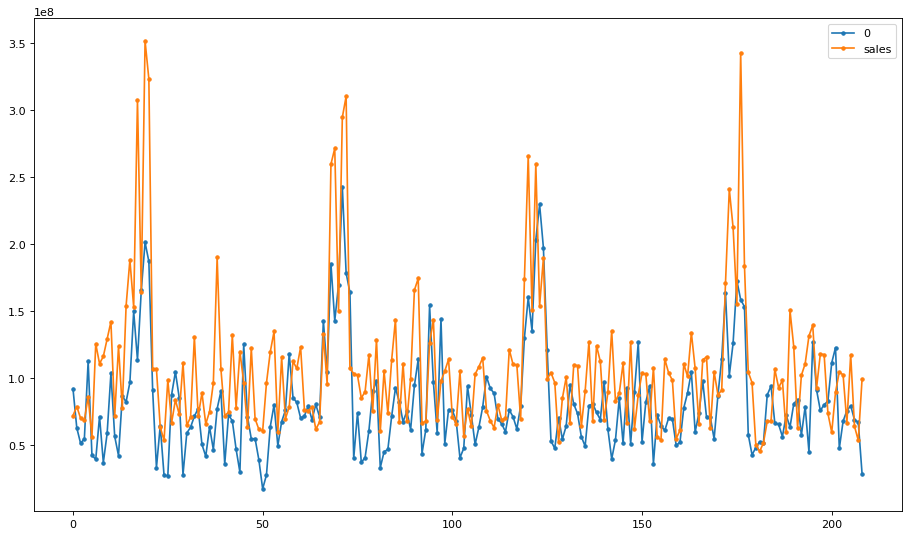

In [11]:
pd.concat((df[cols_impressions].sum(axis=1), df.sales), axis=1).plot(marker='.');

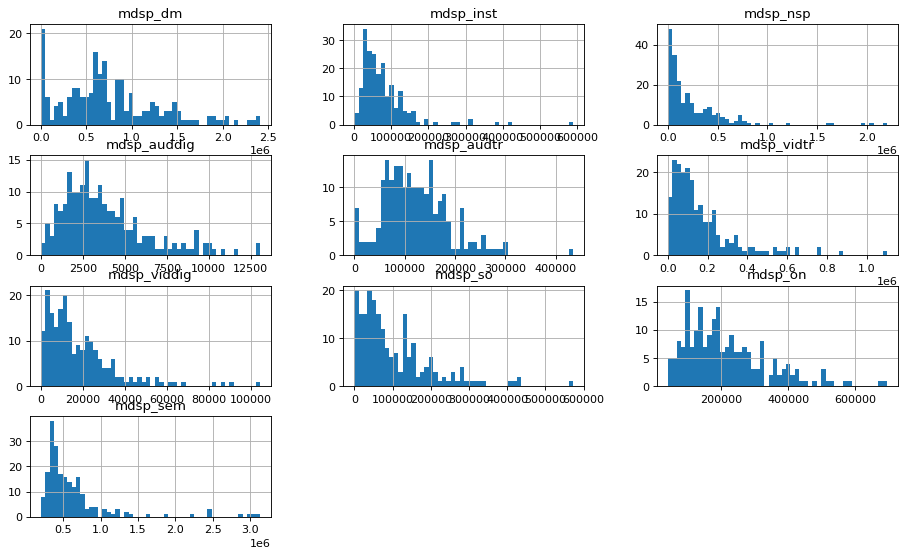

In [12]:
# plot histograms of all numeric columns
df[cols_spend].hist(bins=50);

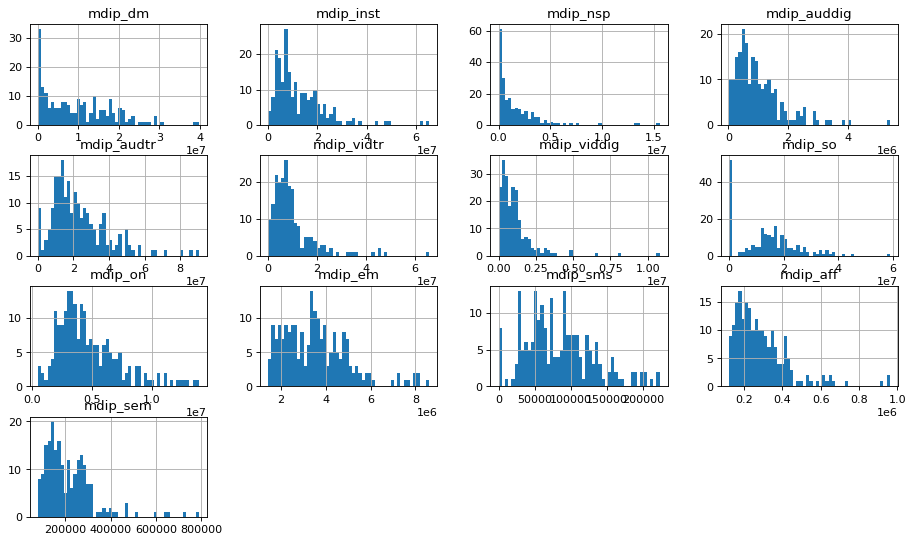

In [13]:
df[cols_impressions].hist(bins=50);

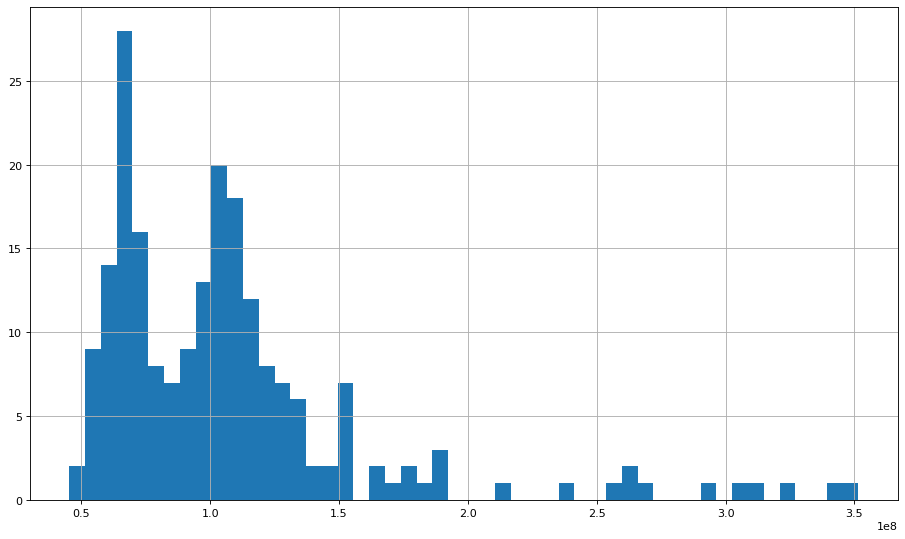

In [14]:
df["sales"].hist(bins=50);

In [15]:
import numpy as np
from scipy.stats import weibull_min

def adstock(x, kind="geometric", alpha=None, delay=0, shape=None, scale=None, normalize=True):
    """
    Apply adstock (carryover) transformation to a media time series.

    Supported adstock variants
    ---------------------------
    - 'geometric'        : immediate geometric decay
    - 'delayed_geometric': geometric decay with fixed delay
    - 'weibull_pdf'      : delayed peak and decay
    - 'weibull_cdf'      : long-tail carryover
    - 'none'             : no carryover

    Parameters
    ----------
    x : array-like, shape (T,)
        Media input over time (spend or impressions). Must be non-negative.

    kind : str, default="geometric"
        Adstock kernel type.

    alpha : float in [0, 1), optional
        Geometric decay parameter. Required for geometric variants.

    delay : int >= 0, default=0
        Number of time steps before carryover begins.
        Useful for channels with delayed response (e.g., direct mail).

    shape : float > 0, optional
        Weibull shape parameter (Weibull variants only).

    scale : float > 0, optional
        Weibull scale parameter controlling memory length.

    normalize : bool, default=True
        Whether to normalize convolution weights to sum to 1.

    Returns
    -------
    adstocked : np.ndarray, shape (T,)
        Adstocked media pressure time series.

    Notes
    -----
    - Delayed geometric adstock is preferred when impact starts after a
      known lag but then decays exponentially.
    - In Bayesian MMM, delay should be fixed or tightly constrained.
    """

    x = np.asarray(x, dtype=float)
    T = len(x)

    if kind == "none":
        return x

    if kind in ("geometric", "delayed_geometric"):
        if alpha is None:
            raise ValueError("alpha must be provided for geometric adstock")

        adstocked = np.zeros_like(x)

        for t in range(T):
            if kind == "delayed_geometric" and t < delay:
                adstocked[t] = 0
            else:
                prev = adstocked[t-1] if t > 0 else 0
                adstocked[t] = x[t-delay] + alpha * prev if t >= delay else 0

        return adstocked

    # Weibull-based adstock
    lags = np.arange(T)

    if shape is None or scale is None:
        raise ValueError("shape and scale must be provided for Weibull adstock")

    if kind == "weibull_pdf":
        weights = weibull_min.pdf(lags, c=shape, scale=scale)

    elif kind == "weibull_cdf":
        weights = 1 - weibull_min.cdf(lags, c=shape, scale=scale)

    else:
        raise ValueError(f"Unknown adstock kind: {kind}")

    if normalize:
        weights = weights / weights.sum()

    adstocked = np.convolve(x, weights, mode="full")[:T]
    return adstocked


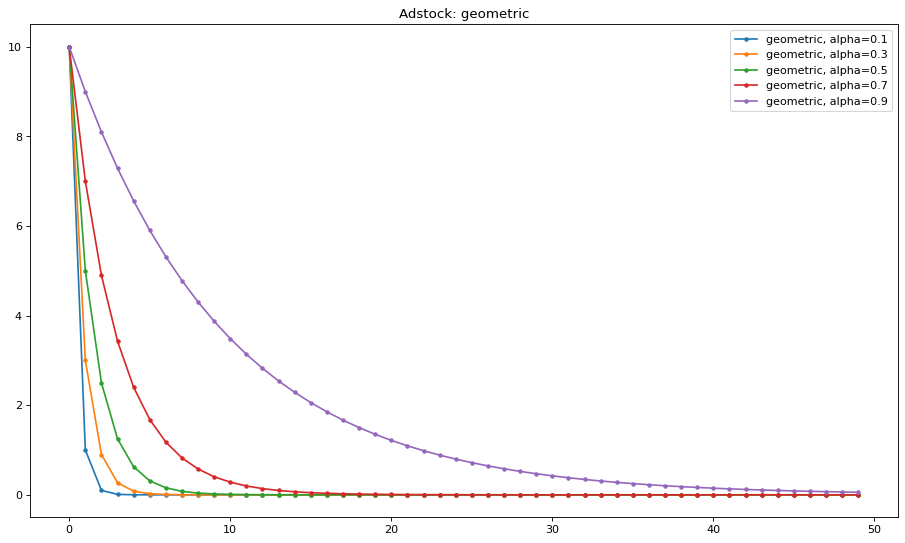

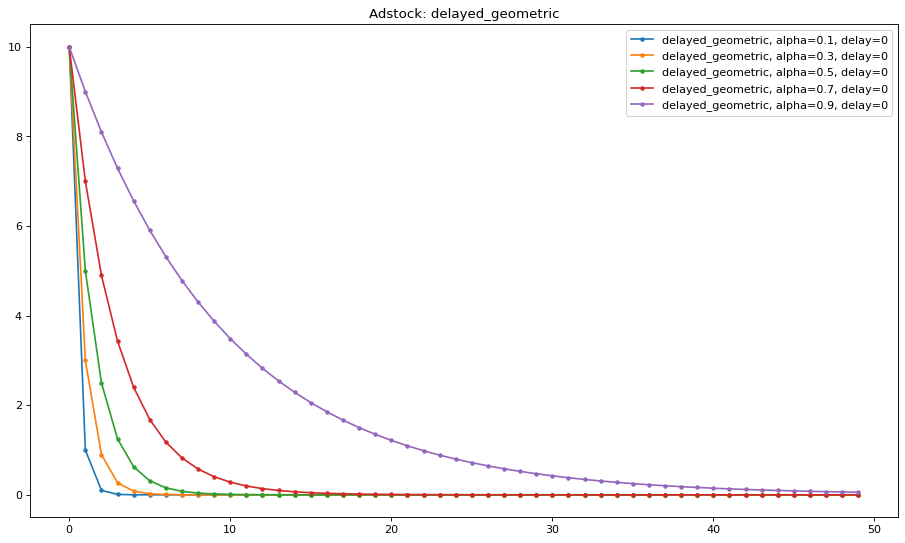

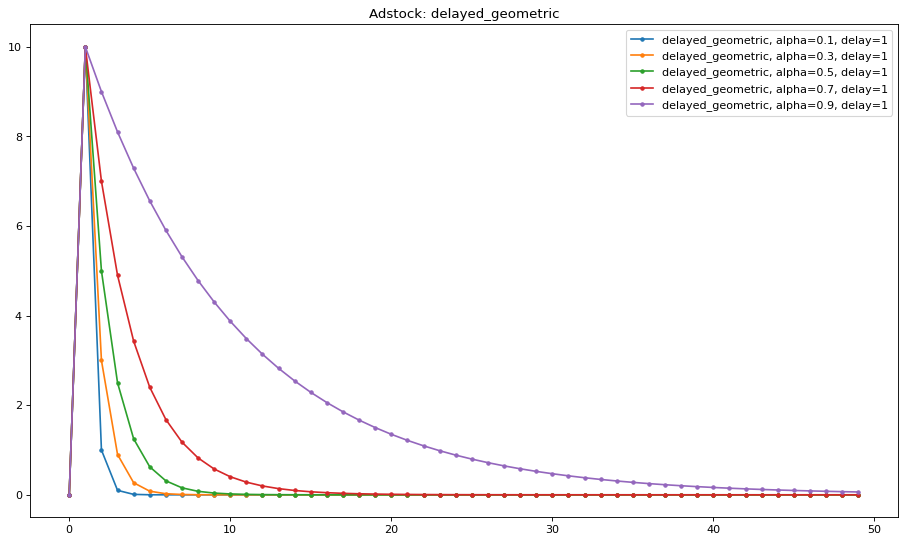

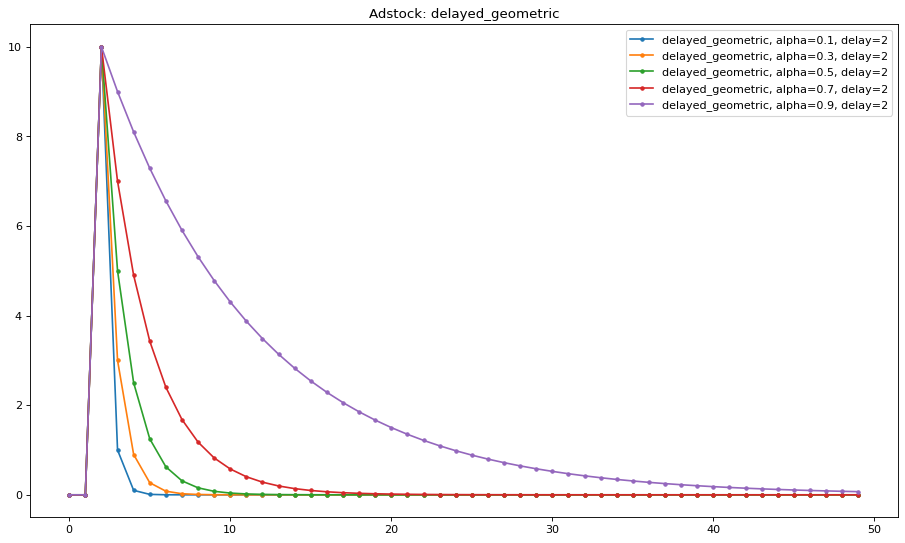

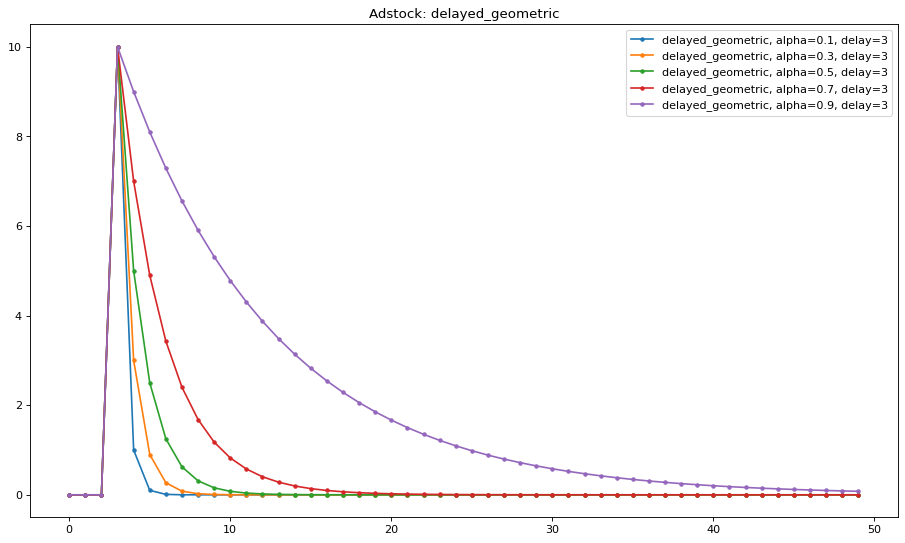

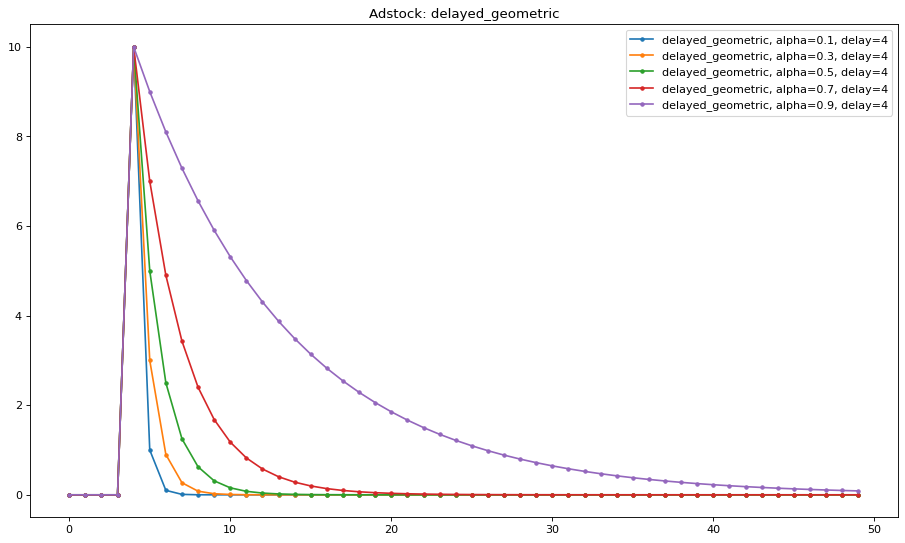

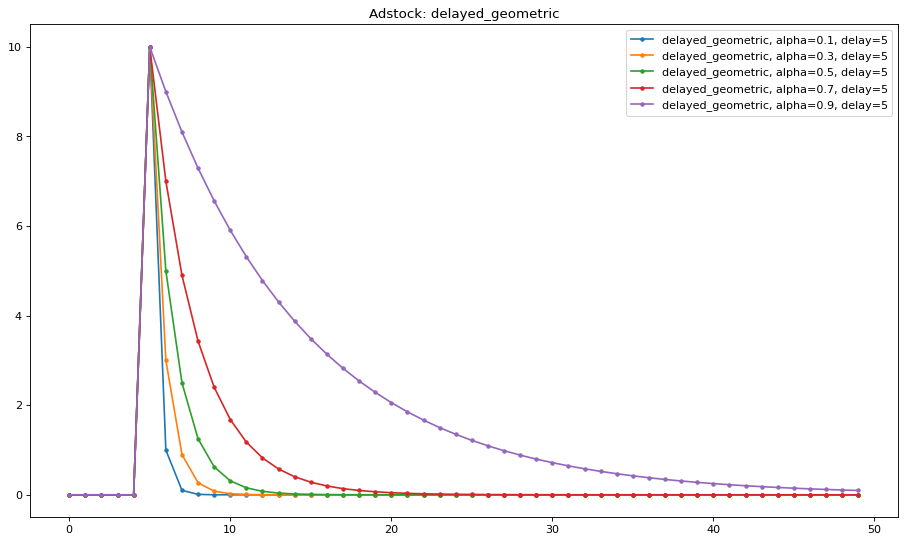

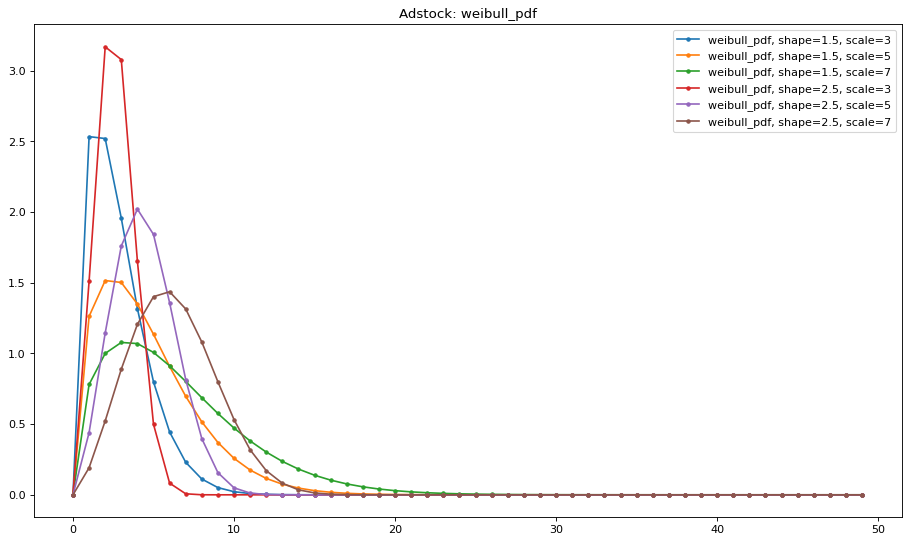

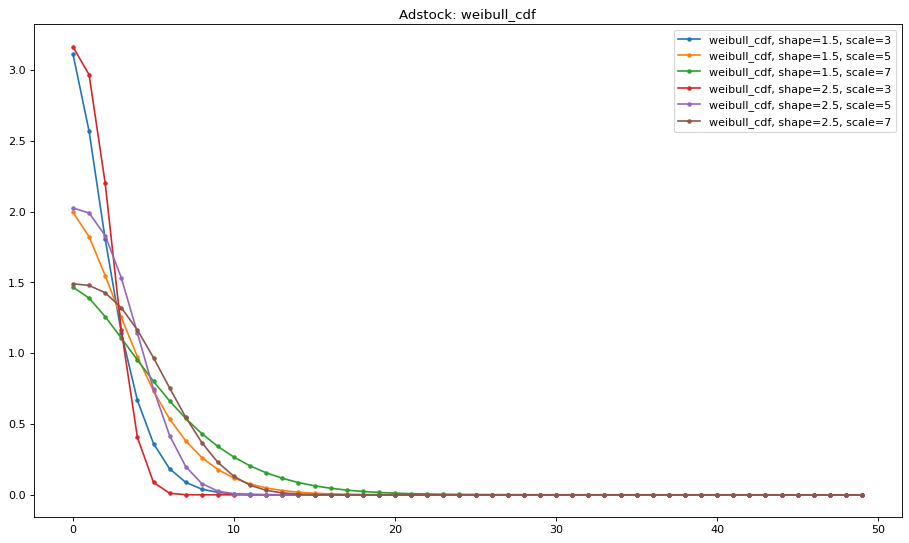

In [17]:
# plot adstock for each category for different values 
kinds = ["geometric", "delayed_geometric", "weibull_pdf", "weibull_cdf"]
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
delays = [0, 1, 2, 3, 4, 5]
shapes = [1.5, 2.5]
scales = [3, 5, 7]
normalize = [False, True]

weeks = 50
x = np.zeros(weeks)
x[0] = 10

for kind in kinds:
    if kind == "geometric":
        for alpha in alphas:
            adstocked = adstock(x, kind=kind, alpha=alpha)
            plt.plot(adstocked, marker='.', label=f"{kind}, alpha={alpha}")
            plt.title(f"Adstock: {kind}")
            plt.legend()
        plt.show()
    elif kind == "delayed_geometric":
        for delay in delays:
            for alpha in alphas:
                adstocked = adstock(x, kind=kind, alpha=alpha, delay=delay)
                plt.plot(adstocked, marker='.', label=f"{kind}, alpha={alpha}, delay={delay}")
                plt.title(f"Adstock: {kind}")
                plt.legend()
            plt.show()
    elif kind == "weibull_pdf":
        for shape in shapes:
            for scale in scales:
                adstocked = adstock(x, kind=kind, shape=shape, scale=scale)
                plt.plot(adstocked, marker='.', label=f"{kind}, shape={shape}, scale={scale}")
                plt.title(f"Adstock: {kind}")
                plt.legend()
        plt.show()
    elif kind == "weibull_cdf":
        for shape in shapes:
            for scale in scales:
                adstocked = adstock(x, kind=kind, shape=shape, scale=scale)
                plt.plot(adstocked, marker='.', label=f"{kind}, shape={shape}, scale={scale}")
                plt.title(f"Adstock: {kind}")
                plt.legend()
        plt.show()

In [18]:
def saturation(x, kind="hill", theta=None, gamma=1.0, k=None, x0=None):
    """
    Apply saturation (diminishing returns) transformation.

    Supported saturation variants
    ------------------------------
    - 'hill'              : standard Hill curve (recommended default)
    - 'tanh'              : symmetric saturation with fast flattening
    - 'michaelis_menten'  : enzyme-kinetics curve (asymmetric, interpretable)
    - 'logistic'          : symmetric S-curve
    - 'exponential'       : rapid early saturation
    - 'none'              : linear response

    Parameters
    ----------
    x : array-like
        Adstocked media pressure. Must be non-negative.

    kind : str, default="hill"
        Saturation curve type.

    theta : float > 0, optional
        Half-saturation constant.
        Used by 'hill' and 'michaelis_menten'.

    gamma : float > 0, default=1.0
        Hill shape parameter. Fixed unless strong evidence exists.

    k : float > 0, optional
        Steepness parameter for tanh, logistic, exponential.

    x0 : float, optional
        Inflection point for logistic saturation.

    Returns
    -------
    saturated : np.ndarray
        Saturated response, typically bounded in (0, 1).

    Notes
    -----
    - Hill and Michaelis–Menten are the most interpretable for MMM.
    - Tanh is useful for digital channels with very fast fatigue.
    """

    x = np.asarray(x, dtype=float)

    if kind == "none":
        return x

    if kind == "hill":
        if theta is None:
            raise ValueError("theta must be provided for Hill saturation")
        return (x**gamma) / (x**gamma + theta**gamma)

    if kind == "michaelis_menten":
        if theta is None:
            raise ValueError("theta must be provided for Michaelis–Menten")
        return x / (x + theta)

    if kind == "tanh":
        if k is None:
            raise ValueError("k must be provided for tanh saturation")
        return np.tanh(k * x)

    if kind == "logistic":
        if k is None or x0 is None:
            raise ValueError("k and x0 must be provided for logistic saturation")
        return 1 / (1 + np.exp(-k * (x - x0)))

    if kind == "exponential":
        if k is None:
            raise ValueError("k must be provided for exponential saturation")
        return 1 - np.exp(-k * x)

    raise ValueError(f"Unknown saturation kind: {kind}")


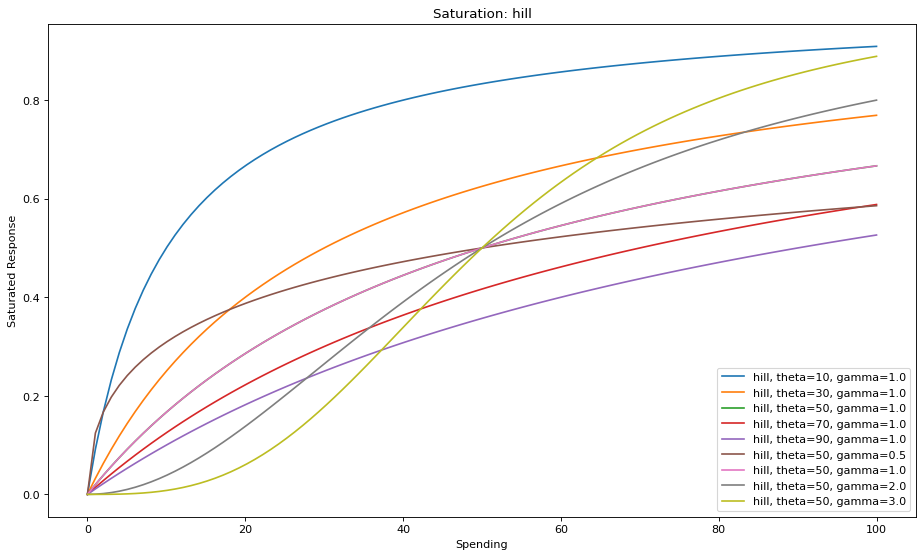

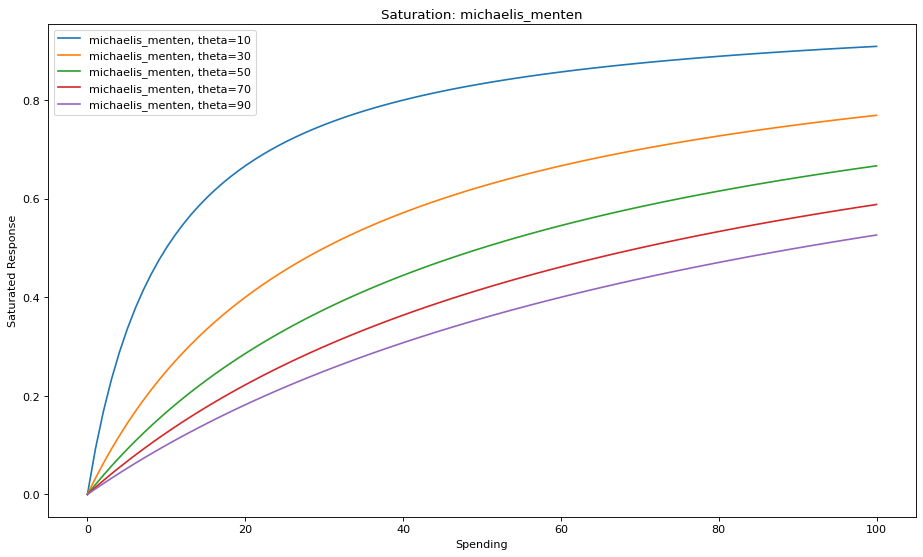

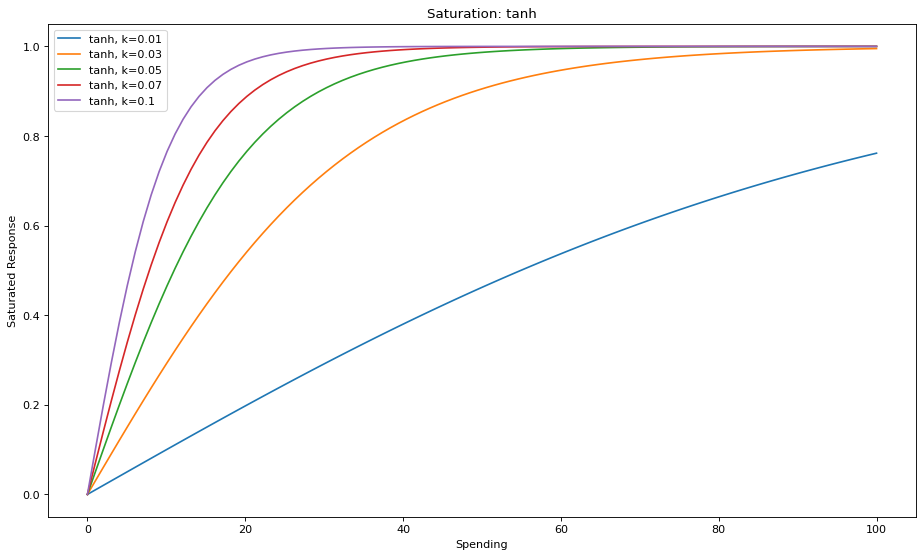

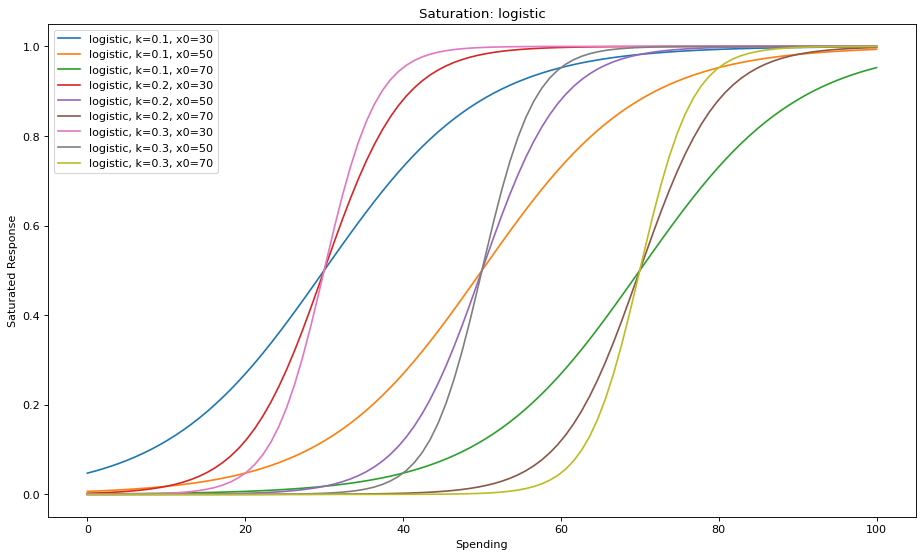

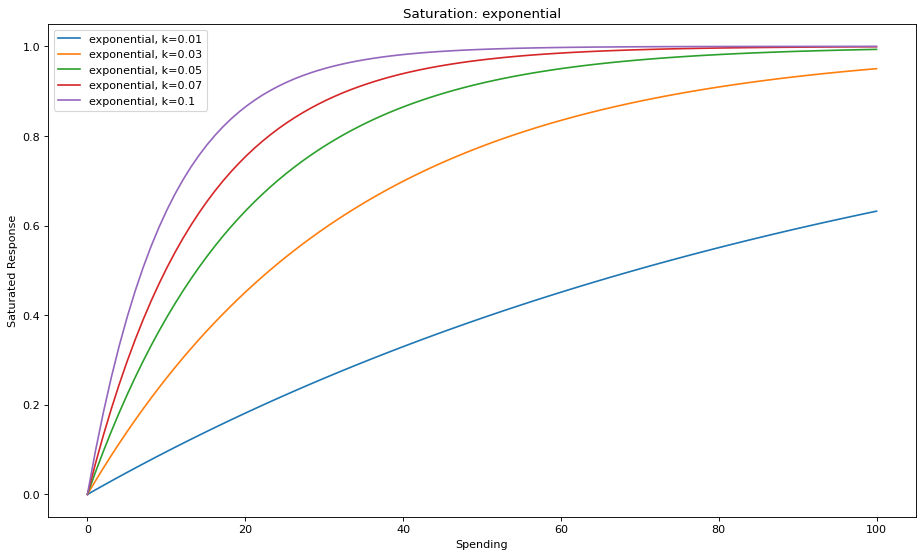

In [19]:
spending = np.linspace(0, 100, 100)

for kind in ["hill", "michaelis_menten", "tanh", "logistic", "exponential"]:
    plt.figure()
    if kind == "hill":
        thetas = [10, 30, 50, 70, 90]
        for theta in thetas:
            saturated = saturation(spending, kind=kind, theta=theta, gamma=1.0)
            plt.plot(spending, saturated, label=f"{kind}, theta={theta}, gamma=1.0")

        gammas = [0.5, 1.0, 2.0, 3.0]
        for gamma in gammas:
            saturated = saturation(spending, kind=kind, theta=50, gamma=gamma)
            plt.plot(spending, saturated, label=f"{kind}, theta=50, gamma={gamma}")

    elif kind == "michaelis_menten":
        thetas = [10, 30, 50, 70, 90]
        for theta in thetas:
            saturated = saturation(spending, kind=kind, theta=theta)
            plt.plot(spending, saturated, label=f"{kind}, theta={theta}")
    elif kind == "tanh":
        ks = [0.01, 0.03, 0.05, 0.07, 0.1]
        for k in ks:
            saturated = saturation(spending, kind=kind, k=k)
            plt.plot(spending, saturated, label=f"{kind}, k={k}")
    elif kind == "logistic":
        ks = [0.1, 0.2, 0.3]
        x0s = [30, 50, 70]
        for k in ks:
            for x0 in x0s:
                saturated = saturation(spending, kind=kind, k=k, x0=x0)
                plt.plot(spending, saturated, label=f"{kind}, k={k}, x0={x0}")
    elif kind == "exponential":
        ks = [0.01, 0.03, 0.05, 0.07, 0.1]
        for k in ks:
            saturated = saturation(spending, kind=kind, k=k)
            plt.plot(spending, saturated, label=f"{kind}, k={k}")
    
    plt.title(f"Saturation: {kind}")
    plt.xlabel("Spending")
    plt.ylabel("Saturated Response")
    plt.legend()
    plt.show()


In [20]:
control_cols = [
    'me_ics_all', 'me_gas_dpg', 'st_ct',
    'mrkdn_valadd_edw', 'mrkdn_pdm', 'va_pub_0.15', 'va_pub_0.2',
    'va_pub_0.25', 'va_pub_0.3', 'hldy_Black Friday', 'hldy_Christmas Day',
    'hldy_Christmas Eve', 'hldy_Columbus Day', 'hldy_Cyber Monday',
    'hldy_Day after Christmas', 'hldy_Easter', "hldy_Father's Day",
    'hldy_Green Monday', 'hldy_July 4th', 'hldy_Labor Day', 'hldy_MLK',
    'hldy_Memorial Day', "hldy_Mother's Day", 'hldy_NYE',
    "hldy_New Year's Day", 'hldy_Pre Thanksgiving', 'hldy_Presidents Day',
    'hldy_Prime Day', 'hldy_Thanksgiving', "hldy_Valentine's Day",
    'hldy_Veterans Day', 'seas_prd_1', 'seas_prd_2', 'seas_prd_3',
    'seas_prd_4', 'seas_prd_5', 'seas_prd_6', 'seas_prd_7', 'seas_prd_8',
    'seas_prd_9', 'seas_prd_12', 'seas_week_40', 'seas_week_41',
    'seas_week_42', 'seas_week_43', 'seas_week_44', 'seas_week_45',
    'seas_week_46', 'seas_week_47', 'seas_week_48'
]

In [21]:
from pymc_marketing.mmm.mmm import MMM
from pymc_marketing.mmm.components.adstock import GeometricAdstock
from pymc_marketing.mmm.components.saturation import LogisticSaturation

mmm = MMM(
    date_column="wk_strt_dt",
    channel_columns=cols_spend,
    control_columns=control_cols,
    adstock=GeometricAdstock(l_max=8),
    saturation=LogisticSaturation(),
)

In [22]:
# mmm.sample_prior_predictive(X=df[cols_spend+control_cols], y=df["sales"], samples=2000)

# fig, ax = plt.subplots()
# mmm.plot_prior_predictive(ax=ax, original_scale=True)
# ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4);

In [ ]:
kwargs = {
    "chains": 4,
    "target_accept": 0.9,
    "random_seed": 42,
}

mmm.fit(X=df[["wk_strt_dt"]+cols_spend+control_cols], y=df["sales"], progressbar=True, **kwargs)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, adstock_alpha, saturation_lam, saturation_beta, gamma_control, y_sigma]


Output()

In [26]:
df.wk_strt_dt  = pd.to_datetime(df.wk_strt_dt)